In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Feature importance
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [4]:
insta_df = pd.read_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\InstagramData.csv')
display(insta_df.head())
use_data = insta_df[['followers',"avg_engagement","avg_likes","avg_comments","insta_image","insta_story","insta_video","insta_reel","amount"]]
# sns.pairplot(insta_df, x_vars=['followers',"insta_image","insta_story","insta_video","insta_reel"], y_vars='amount')
insta_x = insta_df[['followers',"avg_engagement","avg_likes","avg_comments","insta_image","insta_story","insta_video","insta_reel"]]
insta_y = insta_df[['amount']]
display(use_data.head())
# display(insta_x)
# display(insta_y)

,Unnamed: 0,insta_user_id,followers,avg_engagement,avg_likes,avg_comments,insta_image,insta_story,insta_video,insta_reel,insta_carousel,amount
0,108,292988,3111,1.79,47.50,8.08,1,1,0,0,0,300
1,41,268867,3325,18.01,594.42,4.50,0,4,1,0,0,2000
2,231,313758,3897,6.86,244.58,22.92,1,1,0,0,0,300
3,239,254680,4062,2.40,95.08,2.50,1,1,0,0,0,300
4,31,308540,4207,3.04,121.00,6.92,0,2,1,0,0,1000


,followers,avg_engagement,avg_likes,avg_comments,insta_image,insta_story,insta_video,insta_reel,amount
0,3111,1.79,47.50,8.08,1,1,0,0,300
1,3325,18.01,594.42,4.50,0,4,1,0,2000
2,3897,6.86,244.58,22.92,1,1,0,0,300
3,4062,2.40,95.08,2.50,1,1,0,0,300
4,4207,3.04,121.00,6.92,0,2,1,0,1000


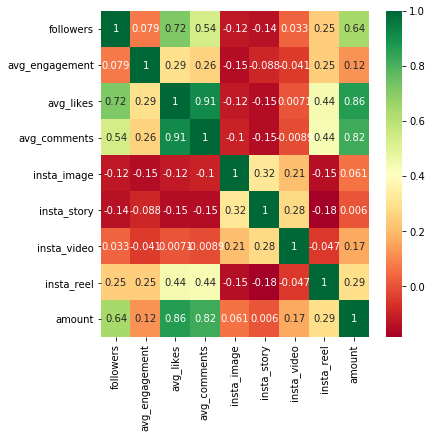

In [21]:
# Feature Importance

# Heatmap
corrmat = use_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(6,6))
#plot heat map
g=sns.heatmap(use_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

,followers,avg_likes,avg_comments,post,amount
0,3111.0,47.50,8.08,2.0,300.0
1,3325.0,594.42,4.50,5.0,2000.0
2,3897.0,244.58,22.92,2.0,300.0
3,4062.0,95.08,2.50,2.0,300.0
4,4207.0,121.00,6.92,3.0,1000.0
...,...,...,...,...,...
237,760520.0,41448.50,117.92,10.0,180000.0
238,760520.0,41448.50,117.92,2.0,55000.0
239,763901.0,22846.50,66.42,2.0,80000.0
240,915864.0,72907.00,368.33,2.0,2222.0


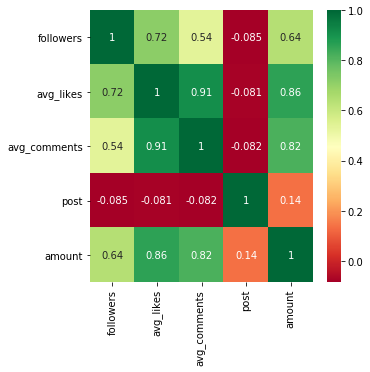

In [7]:
# Data Improve 1
# According to heatmap; followers, likes, comments are most 
# important feature. 
# Summing up insta posts to one [image,story,video,reel]
insta_impro_1 = pd.DataFrame(columns = ["followers","avg_likes","avg_comments","post","amount"])
for i in use_data.index:
    push_dict= {"followers":use_data.followers.loc[i],
                "avg_likes":use_data.avg_likes.loc[i],
                "avg_comments":use_data.avg_comments.loc[i],
                "post":use_data.insta_image.loc[i]+use_data.insta_reel.loc[i]+use_data.insta_video.loc[i]+use_data.insta_story.loc[i],
                "amount":use_data.amount.loc[i]}
    insta_impro_1 = insta_impro_1.append(push_dict,ignore_index=True)
display(insta_impro_1)

#Heatmap
corrmat = insta_impro_1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(insta_impro_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
# Model testing
x_train,x_test,y_train,y_test = train_test_split(insta_impro_1.iloc[:,:-1],insta_impro_1.iloc[:,4:5],random_state=20)
linreg = LinearRegression()
linreg.fit(x_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

# Testing 
y_pred = linreg.predict(x_test)  
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2 score",metrics.r2_score(y_test, y_pred,multioutput='variance_weighted'))

[-6835.75718309]
[[5.07438883e-03 6.83981653e-01 4.71260480e+01 2.65477520e+03]]
20127.716463177356
r2 score 0.3682093397410051


## Modifying Data
### separate video,reel,story,image to make 4 different formula
#### Sum up these formulas to get price estimation

In [9]:
# Multiplying weight to post type
# Story = 4 | Image = 7 | Video = 10 | Reel = 11
weighted_insta_df = insta_df[['followers',"avg_engagement","avg_likes","avg_comments","insta_image","insta_story","insta_video","insta_reel","amount"]]
for i in weighted_insta_df.index:
    weighted_insta_df.insta_image.loc[i] = weighted_insta_df.insta_image.loc[i]*7
    weighted_insta_df.insta_story.loc[i] = weighted_insta_df.insta_story.loc[i]*4
    weighted_insta_df.insta_video.loc[i] = weighted_insta_df.insta_video.loc[i]*10
    weighted_insta_df.insta_reel.loc[i] = weighted_insta_df.insta_reel.loc[i]*11

display(weighted_insta_df)

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\acer\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\acer\anaconda3\lib\site-packages\ipyker

,followers,avg_engagement,avg_likes,avg_comments,insta_image,insta_story,insta_video,insta_reel,amount
0,3111,1.79,47.50,8.08,7,4,0,0,300
1,3325,18.01,594.42,4.50,0,16,10,0,2000
2,3897,6.86,244.58,22.92,7,4,0,0,300
3,4062,2.40,95.08,2.50,7,4,0,0,300
4,4207,3.04,121.00,6.92,0,8,10,0,1000
...,...,...,...,...,...,...,...,...,...
237,760520,5.47,41448.50,117.92,21,16,30,0,180000
238,760520,5.47,41448.50,117.92,0,4,10,0,55000
239,763901,3.00,22846.50,66.42,0,4,10,0,80000
240,915864,8.00,72907.00,368.33,0,4,10,0,2222


,followers,avg_engagement,avg_likes,avg_comments,insta_image,amount
0,3111.0,1.79,47.50,8.08,1.0,190.909091
1,3325.0,18.01,594.42,4.50,0.0,0.000000
2,3897.0,6.86,244.58,22.92,1.0,190.909091
3,4062.0,2.40,95.08,2.50,1.0,190.909091
4,4207.0,3.04,121.00,6.92,0.0,0.000000
...,...,...,...,...,...,...
237,760520.0,5.47,41448.50,117.92,3.0,56417.910448
238,760520.0,5.47,41448.50,117.92,0.0,0.000000
239,763901.0,3.00,22846.50,66.42,0.0,0.000000
240,915864.0,8.00,72907.00,368.33,0.0,0.000000


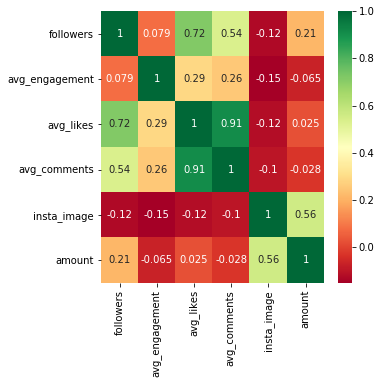

In [11]:
# # # Instagram Image # # #
insta_image_df = pd.DataFrame(columns = ['followers',"avg_engagement","avg_likes","avg_comments","insta_image","amount"])
for i in weighted_insta_df.index:
    post_sum = sum(weighted_insta_df.iloc[i,4:8].tolist())
    est_amount = weighted_insta_df.iloc[i,-1] * (weighted_insta_df.iloc[i,4]/post_sum)
    est_dict = {"followers":weighted_insta_df.followers.loc[i],
                "avg_engagement":weighted_insta_df.avg_engagement.loc[i],
                "avg_likes":weighted_insta_df.avg_likes.loc[i],
                "avg_comments":weighted_insta_df.avg_comments.loc[i],
                "insta_image":weighted_insta_df.insta_image.loc[i]/7,
                "amount":est_amount}
    insta_image_df = insta_image_df.append(est_dict,ignore_index=True)


display(insta_image_df)

#Heatmap
corrmat = insta_image_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(insta_image_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
insta_image_df.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Price_insta_image.csv')

,followers,avg_engagement,avg_likes,avg_comments,insta_story,amount
0,3111.0,1.79,47.50,8.08,1.0,109.090909
1,3325.0,18.01,594.42,4.50,4.0,1230.769231
2,3897.0,6.86,244.58,22.92,1.0,109.090909
3,4062.0,2.40,95.08,2.50,1.0,109.090909
4,4207.0,3.04,121.00,6.92,2.0,444.444444
...,...,...,...,...,...,...
237,760520.0,5.47,41448.50,117.92,4.0,42985.074627
238,760520.0,5.47,41448.50,117.92,1.0,15714.285714
239,763901.0,3.00,22846.50,66.42,1.0,22857.142857
240,915864.0,8.00,72907.00,368.33,1.0,634.857143


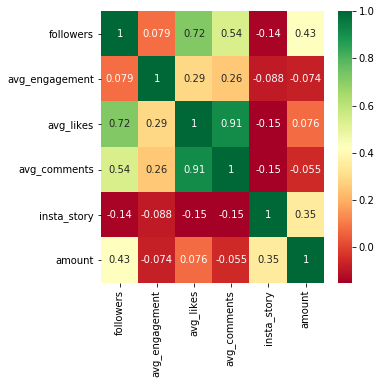

In [17]:
# # # Instagram Story # # #
insta_story_df = pd.DataFrame(columns = ['followers',"avg_engagement","avg_likes","avg_comments","insta_story","amount"])
for i in weighted_insta_df.index:
    post_sum = sum(weighted_insta_df.iloc[i,4:8].tolist())
    est_amount = weighted_insta_df.iloc[i,-1] * (weighted_insta_df.iloc[i,5]/post_sum)
    est_dict = {"followers":weighted_insta_df.followers.loc[i],
                "avg_engagement":weighted_insta_df.avg_engagement.loc[i],
                "avg_likes":weighted_insta_df.avg_likes.loc[i],
                "avg_comments":weighted_insta_df.avg_comments.loc[i],
                "insta_story":weighted_insta_df.insta_story.loc[i]/4,
                "amount":est_amount}
    insta_story_df = insta_story_df.append(est_dict,ignore_index=True)


display(insta_story_df)

#Heatmap
corrmat = insta_story_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(insta_story_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
insta_story_df.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Price_insta_story.csv')

,followers,avg_engagement,avg_likes,avg_comments,insta_video,amount
0,3111.0,1.79,47.50,8.08,0.0,0.000000
1,3325.0,18.01,594.42,4.50,1.0,769.230769
2,3897.0,6.86,244.58,22.92,0.0,0.000000
3,4062.0,2.40,95.08,2.50,0.0,0.000000
4,4207.0,3.04,121.00,6.92,1.0,555.555556
...,...,...,...,...,...,...
237,760520.0,5.47,41448.50,117.92,3.0,80597.014925
238,760520.0,5.47,41448.50,117.92,1.0,39285.714286
239,763901.0,3.00,22846.50,66.42,1.0,57142.857143
240,915864.0,8.00,72907.00,368.33,1.0,1587.142857


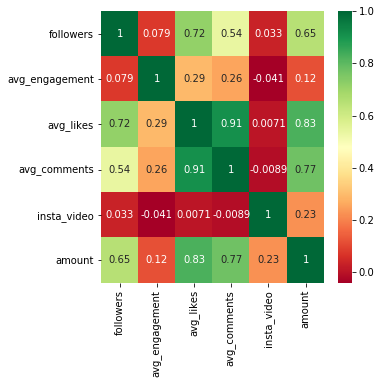

In [19]:
# # # Instagram video # # #
insta_video_df = pd.DataFrame(columns = ['followers',"avg_engagement","avg_likes","avg_comments","insta_video","amount"])
for i in weighted_insta_df.index:
    post_sum = sum(weighted_insta_df.iloc[i,4:8].tolist())
    est_amount = weighted_insta_df.iloc[i,-1] * (weighted_insta_df.iloc[i,6]/post_sum)
    est_dict = {"followers":weighted_insta_df.followers.loc[i],
                "avg_engagement":weighted_insta_df.avg_engagement.loc[i],
                "avg_likes":weighted_insta_df.avg_likes.loc[i],
                "avg_comments":weighted_insta_df.avg_comments.loc[i],
                "insta_video":weighted_insta_df.insta_video.loc[i]/10,
                "amount":est_amount}
    insta_video_df = insta_video_df.append(est_dict,ignore_index=True)


display(insta_video_df)

#Heatmap
corrmat = insta_video_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(insta_video_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
insta_video_df.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Price_insta_video.csv')

,followers,avg_engagement,avg_likes,avg_comments,insta_reel,amount
0,3111.0,1.79,47.50,8.08,0.0,0.000000
1,3325.0,18.01,594.42,4.50,0.0,0.000000
2,3897.0,6.86,244.58,22.92,0.0,0.000000
3,4062.0,2.40,95.08,2.50,0.0,0.000000
4,4207.0,3.04,121.00,6.92,0.0,0.000000
...,...,...,...,...,...,...
237,760520.0,5.47,41448.50,117.92,0.0,0.000000
238,760520.0,5.47,41448.50,117.92,0.0,0.000000
239,763901.0,3.00,22846.50,66.42,0.0,0.000000
240,915864.0,8.00,72907.00,368.33,0.0,0.000000


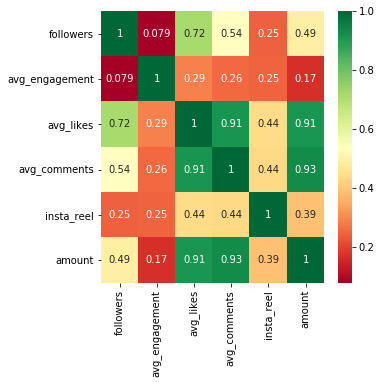

In [23]:
# # # Instagram reel # # #
insta_reel_df = pd.DataFrame(columns = ['followers',"avg_engagement","avg_likes","avg_comments","insta_reel","amount"])
for i in weighted_insta_df.index:
    post_sum = sum(weighted_insta_df.iloc[i,4:8].tolist())
    est_amount = weighted_insta_df.iloc[i,-1] * (weighted_insta_df.iloc[i,7]/post_sum)
    est_dict = {"followers":weighted_insta_df.followers.loc[i],
                "avg_engagement":weighted_insta_df.avg_engagement.loc[i],
                "avg_likes":weighted_insta_df.avg_likes.loc[i],
                "avg_comments":weighted_insta_df.avg_comments.loc[i],
                "insta_reel":weighted_insta_df.insta_reel.loc[i]/11,
                "amount":est_amount}
    insta_reel_df = insta_reel_df.append(est_dict,ignore_index=True)


display(insta_reel_df)

#Heatmap
corrmat = insta_reel_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(5,5))
#plot heat map
g=sns.heatmap(insta_reel_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
insta_reel_df.to_csv(r'E:\Winkl Mains\Task_2 Price Prediction\DATA\Price_insta_reel.csv')

## End of Instagram data cleaning and formating

In [38]:
# Linear Regression
x_train,x_test,y_train,y_test = train_test_split(insta_image_df.iloc[:,:-1],insta_image_df.iloc[:,-1:],random_state=40)
linreg = LinearRegression()
linreg.fit(x_train,y_train)
print(linreg.intercept_)
print(linreg.coef_)

# Testing 
y_pred = linreg.predict(x_test)  
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("r2 score",metrics.r2_score(y_test, y_pred,multioutput='variance_weighted'))

[-1242.53751494]
[[ 1.23421114e-02  2.57275639e+01 -3.79090463e-02 -3.90524072e-01
   3.00627907e+03]]
2912.0511295353867
r2 score 0.563809827167788
